<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-Daily-from-Scratch/blob/main/Feedforward_Diabetes_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df[df['Outcome']==1].head() # Rows that is positive with diabetes
df[df['Outcome']==0].head() # Rows that is negative with diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


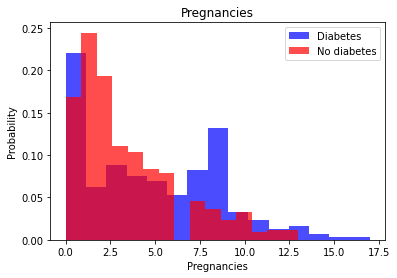

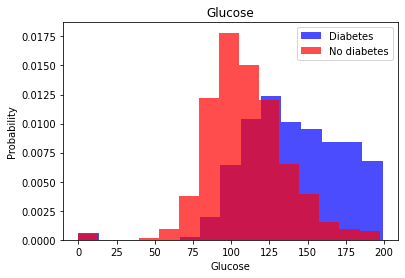

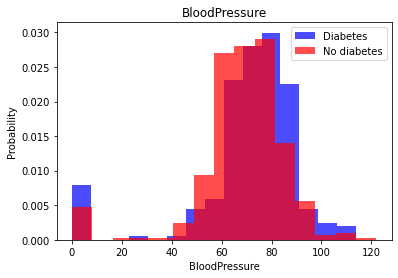

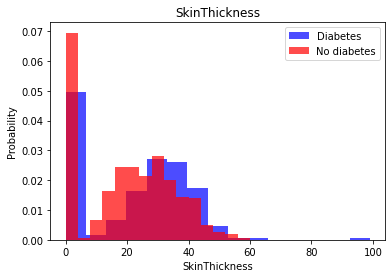

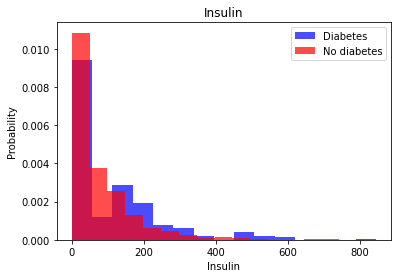

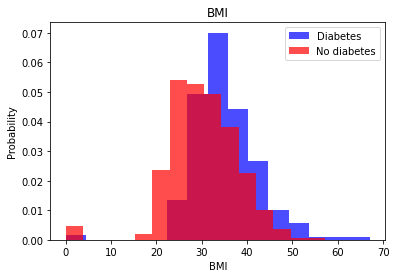

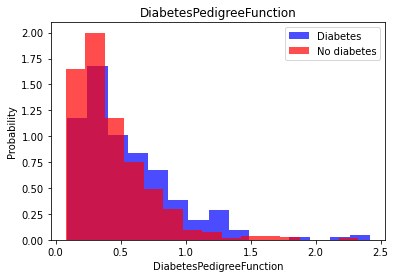

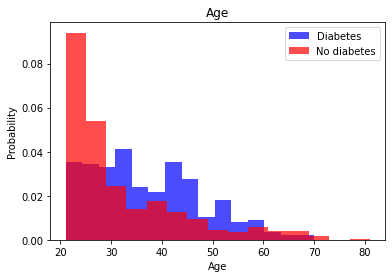

In [22]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.xlabel(label)
  plt.title(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

## Features matrix and Outcome vector

In [55]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [31]:
X.shape, y.shape

((768, 8), (768,))

### Scaling dataset

In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

### Plot transformed dataframe

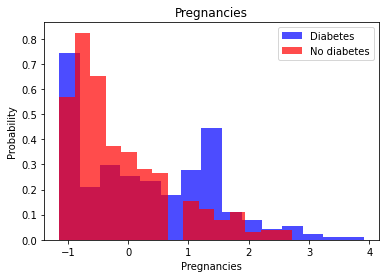

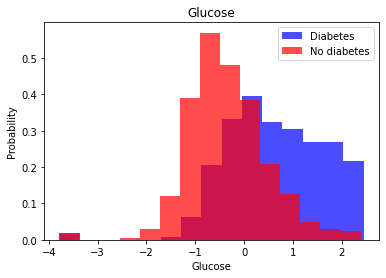

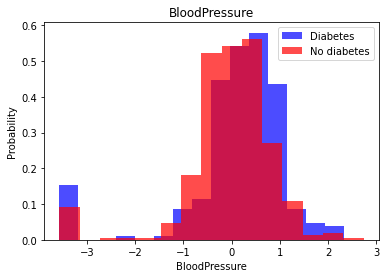

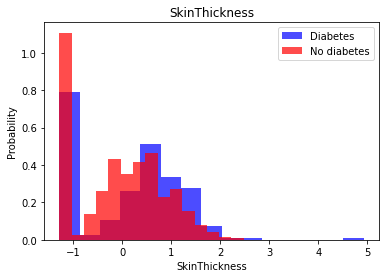

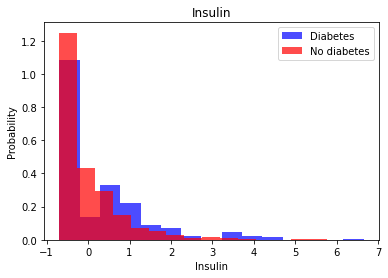

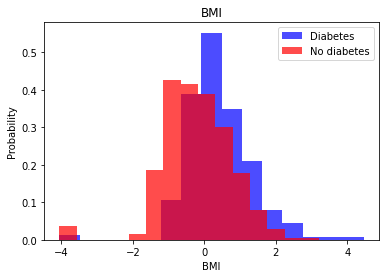

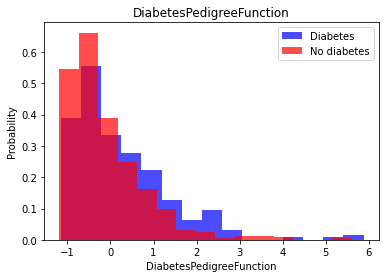

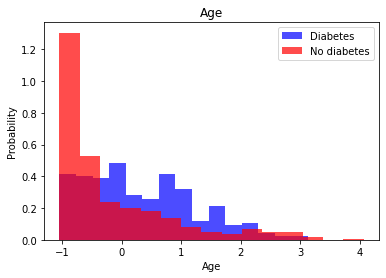

In [60]:
for i in range(len(transformed_df.columns[:-1])):
  label = transformed_df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.xlabel(label)
  plt.title(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

### Resampling overfitted model

In [67]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(268, 500)

In [71]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [72]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

### Splitting testing data and training data

In [73]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [74]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation="sigmoid")
])

In [75]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [76]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 1ms/step - loss: 0.7786 - accuracy: 0.4217


[0.7786279916763306, 0.4216666519641876]

In [77]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.7641 - accuracy: 0.4800


[0.7641116976737976, 0.47999998927116394]

In [78]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 3ms/step - loss: 0.7323 - accuracy: 0.4550 - val_loss: 0.6784 - val_accuracy: 0.5500
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.5833 - val_loss: 0.6210 - val_accuracy: 0.6850
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.7100 - val_loss: 0.5751 - val_accuracy: 0.7250
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7433 - val_loss: 0.5430 - val_accuracy: 0.7400
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7550 - val_loss: 0.5162 - val_accuracy: 0.7500
Epoch 6/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.7517 - val_loss: 0.5019 - val_accuracy: 0.7550
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7533 - val_loss: 0.4936 - val_accuracy: 0.7500
Epoch 8/20
38/38 [==

In [81]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7400


[0.4789285361766815, 0.7400000095367432]